In [1]:
#import library
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [2]:
#read dataset
dataset = pd.read_csv('dams and reservoirs.csv')
dataset.head()

,Reservior name,dam name,river,main basin,sub basin,near city,administration city,COUNTRY,secondary country,YEAR,...,CAPITAL EXPENDITURE,DEPTH(m),AVG DISPLACEMENT OF WATER,CATCHMENT area in sqkm,MAIN_USAGE,"MULTI_DAMS,C,10",TIMELINE(status),status,longitude,latitude
0,Grand Lake,Terror Lake,Terror River,Krishna-Godavari,Vaal,Bulawayo,Alaska,United States,Portugal,1984,...,133.2,63.4,1019,41,Hydroelectricity,Yes,Replacement,3: Fair,-153.027083,57.651250
1,Grand Lake,Mayo,Mayo,Krishna-Godavari,Vaal,Whitehorse,Yukon,Canada,Portugal,1952,...,264.8,2.9,2141,1173,Hydroelectricity,Yes,Replacement,1: Verified,-135.362917,63.774583
2,Grand Lake,Blue Lake,Sawmill Creek,Krishna-Godavari,Vaal,Bulawayo,Alaska,United States,Portugal,1961,...,179.1,40.7,4255,96,Hydroelectricity,Yes,Replacement,2: Good,-135.199583,57.066250
3,Grand Lake,Green Lake,Vodopad River,Krishna-Godavari,Vaal,Bulawayo,Alaska,United States,Portugal,1982,...,115.9,29.7,3337,76,Hydroelectricity,Yes,Replacement,2: Good,-135.110417,56.990417
4,Long Lake,Long Lake Dam,Long River,Krishna-Godavari,Vaal,Bulawayo,Alaska,United States,Portugal,1973,...,181.3,34.2,1912,79,Hydroelectricity,Yes,Replacement,4: Poor,-133.728750,58.170417


In [79]:
from sklearn.preprocessing import StandardScaler

#subset dan scale data
dataset_subset = dataset[['CATCHMENT area in sqkm','DEPTH(m)']]
plt.show()

ss = StandardScaler()
scaled = ss.fit_transform(dataset_subset)

# UNSUPERVISED LEARNING

Pada algoritma unsupervised learning, data tidak memiliki label secara eksplisit dan model mampu belajar dari data dengan menemukan pola yang implisit. Sangat berbeda dengan supervised learning, unsupervised learning merupakan jenis learning yang hanya mempunyai variabel input tapi tidak mempunyai variabel output yang berhubungan. Tujuan dari Machine Learning ini adalah untuk memodelkan struktur data dan menyimpulkan fungsi yang mendeskripsikan data tersebut.

# Hierarchical Clustering

Algoritma ini menghasilkan sekumpulan cluster bersarang dalam bentuk hirarki pohon. Algoritma ini dapat divisualisasikan menggunakan dendogram atau bubble.
Algoritma ini tidak harus menentukan jumlah cluster. Jumlah cluster yang diinginkan didapatkan dengan memotong dendogram pada level yang tepat.

### Agglomerative Clustering

In [80]:
from sklearn.cluster import AgglomerativeClustering

#membuat objek dari AgglomerativeClustering dnegna jumlah cluster 3
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

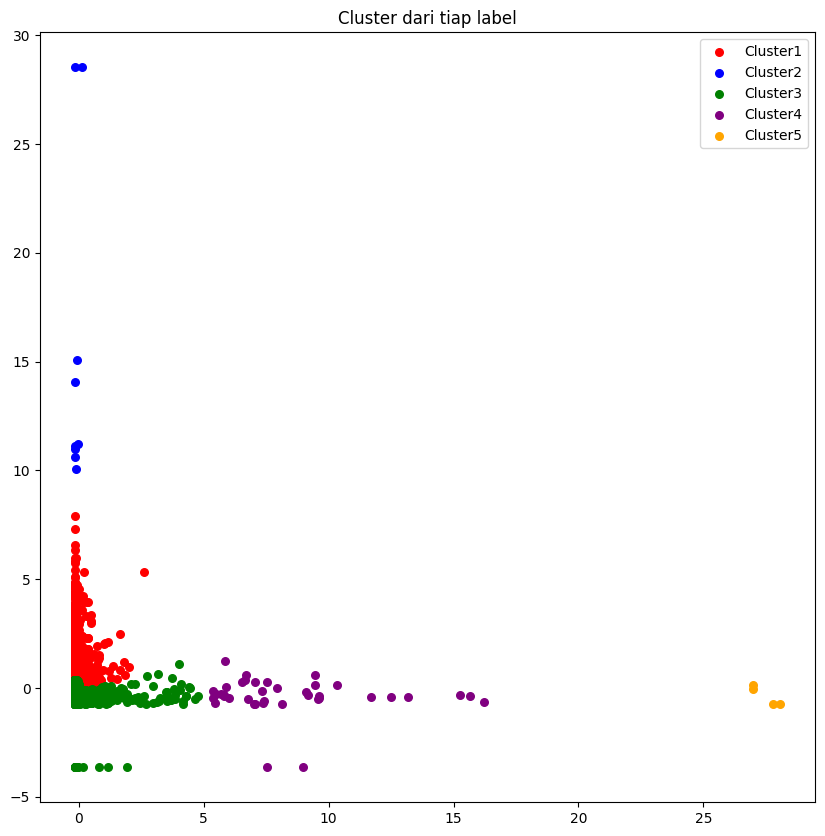

In [81]:
aggClus = hc.fit_predict(scaled)

#visualisasi cluster
plt.figure(figsize=(10,10))

#data point
plt.scatter(scaled[aggClus==0, 0],scaled[aggClus==0, 1], s=30, c='red', label ='Cluster1')
plt.scatter(scaled[aggClus==1, 0],scaled[aggClus==1, 1], s=30, c='blue', label ='Cluster2')
plt.scatter(scaled[aggClus==2, 0],scaled[aggClus==2, 1], s=30, c='green', label ='Cluster3')
plt.scatter(scaled[aggClus==3, 0],scaled[aggClus==3, 1], s=30, c='purple', label ='Cluster4')
plt.scatter(scaled[aggClus==4, 0],scaled[aggClus==4, 1], s=30, c='orange', label ='Cluster5')

plt.title("Cluster dari tiap label")
plt.legend()
plt.show()

### Dendogram

In [82]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [83]:
hr_linkage = linkage(scaled, method='ward')

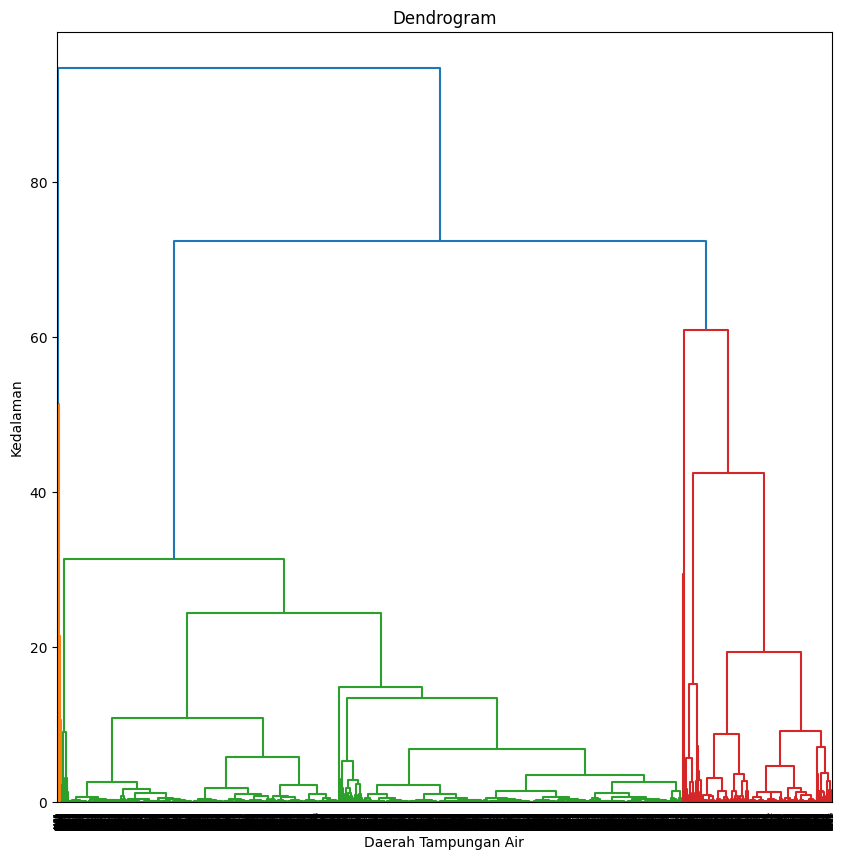

In [84]:
plt.figure(figsize=(10,10))
dendrogram(hr_linkage)
plt.title("Dendrogram")
plt.xlabel("Daerah Tampungan Air")
plt.ylabel("Kedalaman")
plt.show()

## Kmean Clustering

Algoritma ini menemukan kelompok data dengan nilai squared error antara rata-rata empiris dari cluster dan point di cluster minimum. Algoritma ini termasuk dalam clustering dengan pendekatan partitional. Setiap cluster berhubungan dengan
centroid (point tengah). Setiap point dimasukkan pada cluster dengan centroid terdekat. Pada algoritma ini nilai K == cluster harus ditentukan.
Centroid pada umumnya dipilih secara random. Biasanya centroid merupakan rata-rata dari point pada cluster. Untuk menentukan setiap data point masuk ke cluster mana, digunakan pengukuran kedekatan(jarak) dengan Euclidean distance,cosine similarity, korelasi, dan lain sebagainya.

In [85]:
from sklearn.cluster import KMeans

In [86]:
df = dataset.rename(columns={"CATCHMENT area in sqkm":"Daerah Tampungan Air", "DEPTH(m)": "Kedalaman"})
df.head(3)

,Reservior name,dam name,river,main basin,sub basin,near city,administration city,COUNTRY,secondary country,YEAR,...,CAPITAL EXPENDITURE,Kedalaman,AVG DISPLACEMENT OF WATER,Daerah Tampungan Air,MAIN_USAGE,"MULTI_DAMS,C,10",TIMELINE(status),status,longitude,latitude
0,Grand Lake,Terror Lake,Terror River,Krishna-Godavari,Vaal,Bulawayo,Alaska,United States,Portugal,1984,...,133.2,63.4,1019,41,Hydroelectricity,Yes,Replacement,3: Fair,-153.027083,57.651250
1,Grand Lake,Mayo,Mayo,Krishna-Godavari,Vaal,Whitehorse,Yukon,Canada,Portugal,1952,...,264.8,2.9,2141,1173,Hydroelectricity,Yes,Replacement,1: Verified,-135.362917,63.774583
2,Grand Lake,Blue Lake,Sawmill Creek,Krishna-Godavari,Vaal,Bulawayo,Alaska,United States,Portugal,1961,...,179.1,40.7,4255,96,Hydroelectricity,Yes,Replacement,2: Good,-135.199583,57.066250


In [87]:
points = df[['Daerah Tampungan Air', 'Kedalaman']]
points = points.values

In [96]:
#Buat objek dari k means dengan jumlah cluster : 4
model = KMeans(n_clusters=4)

#fit terhadap model
model.fit(points)

KMeans(n_clusters=4)

In [89]:
#menentukan label untuk cluster
y = model.fit_predict(points)
print(y)

[0 0 0 ... 0 0 0]


In [90]:
#menampung koordinat dari tiap centroid
centroid = model.cluster_centers_

centroid_x = centroid[:,0]
centroid_y = centroid[:,1]

In [91]:
centroid

array([[5.41647552e+03, 2.55999260e+01],
       [9.66435690e+05, 1.00793103e+01],
       [2.81200725e+06, 1.40500000e+01],
       [3.50176691e+05, 2.14264706e+01]])

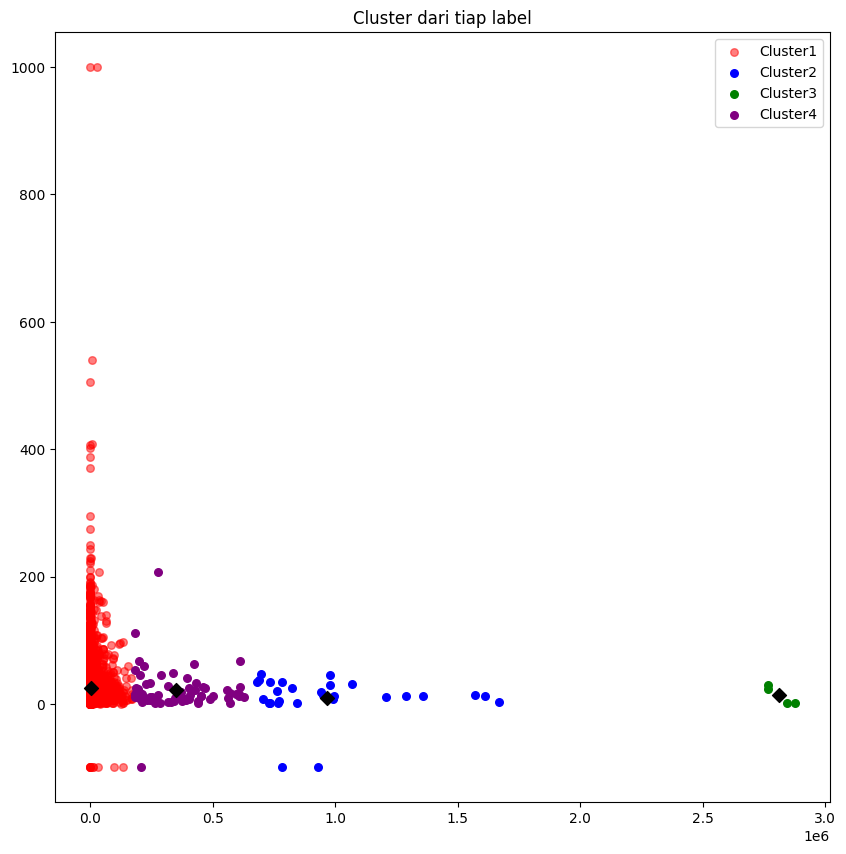

In [92]:
#visualisasi cluster
plt.figure(figsize=(10,10))

#data point
plt.scatter(points[y==0, 0],points[y==0, 1], s=30, c='red', label ='Cluster1', alpha=0.5)
plt.scatter(points[y==1, 0],points[y==1, 1], s=30, c='blue', label ='Cluster2')
plt.scatter(points[y==2, 0],points[y==2, 1], s=30, c='green', label ='Cluster3')
plt.scatter(points[y==3, 0],points[y==3, 1], s=30, c='purple', label ='Cluster4')

#centroid point
plt.scatter(centroid_x, centroid_y, marker='D', s=50 ,c='black')
plt.title("Cluster dari tiap label")
plt.legend()
plt.show()

In [93]:
#menentukan jumlah cluster
cluster = range(1,7)
inertias = []

for n in cluster :
    model = KMeans(n_clusters=n)
    model.fit(points)
    inertias.append(model.inertia_)

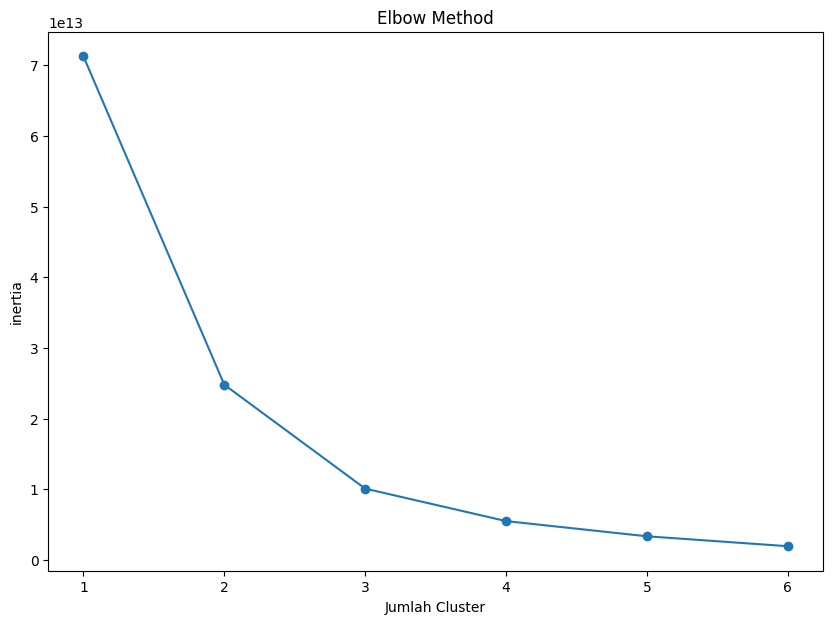

In [95]:
#plot ks vs inertias
plt.figure(figsize = (10,7))
plt.plot(cluster, inertias, '-o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("inertia")
plt.title("Elbow Method")
plt.xticks(cluster)
plt.show()

#### Inertia:
Inertia mengukur seberapa baik sebuah datasat melakukan clustering.